### LIBRARIES TO INSTALL

In [87]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [88]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [89]:
pip install pylab

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pylab (from versions: none)
ERROR: No matching distribution found for pylab


In [90]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [91]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


### IMPORTS

In [92]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, r2_score
from collections import defaultdict

### DOWNLOAD AND LOAD DATA

In [93]:
import os
from io import BytesIO
import requests
from zipfile import ZipFile
from urllib.request import urlopen
import zipfile

url = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip'

df = pd.read_csv(url, compression="zip")

df = df[5::6]

#plot data
df_temp = df[['Date Time', 'T (degC)', 'Tpot (K)', 'Tdew (degC)']].copy()
df_temp['Date Time'] = pd.to_datetime(df_temp['Date Time'], format='%d.%m.%Y %H:%M:%S')
df_temp.set_index('Date Time', inplace=True)


date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


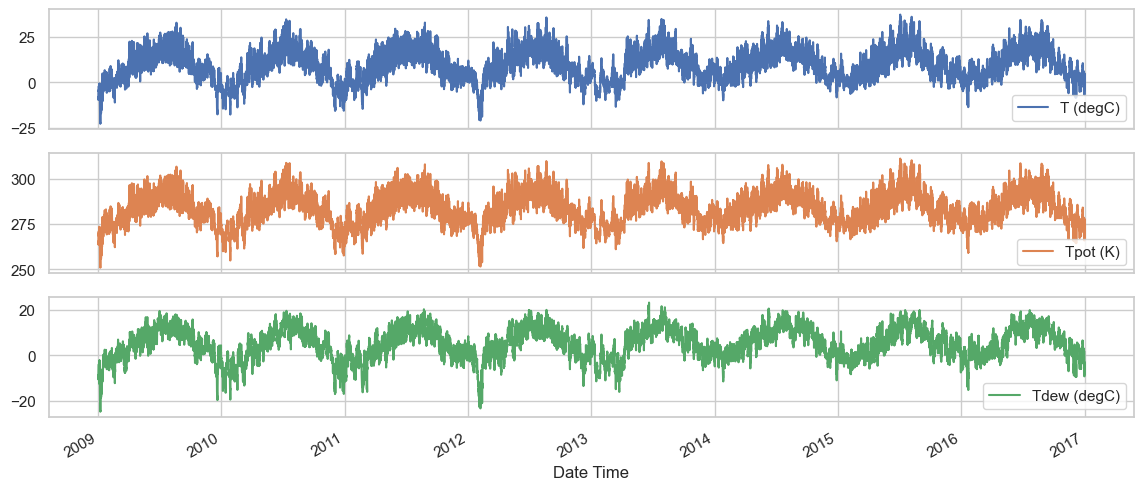

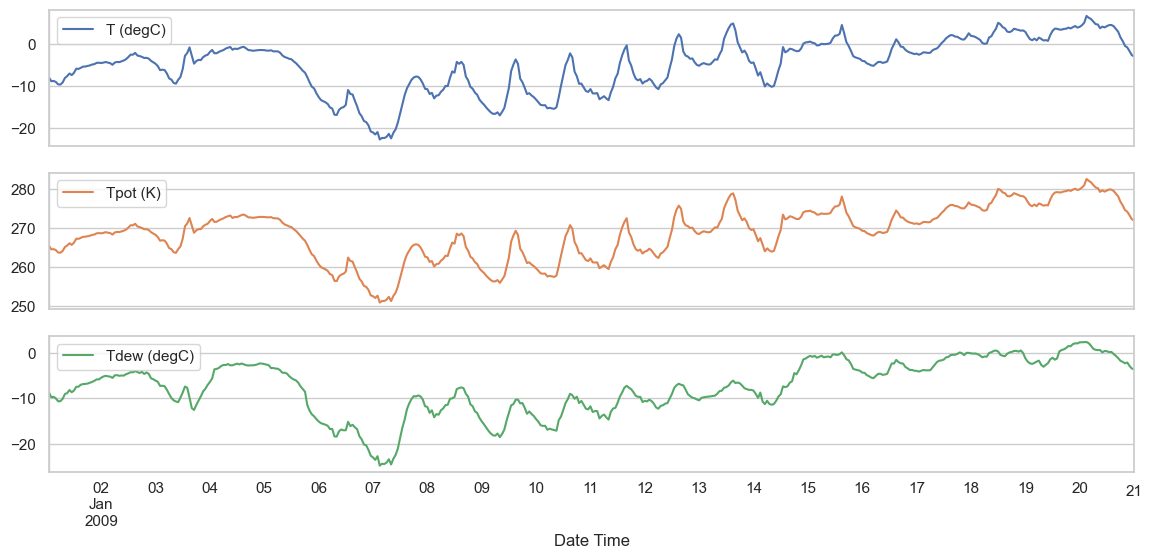

In [94]:
plot_cols = ['T (degC)', 'Tpot (K)', 'Tdew (degC)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [95]:
target_col = 'T (degC)'
sequence_length = 24
df.describe().transpose()
target_index = df.columns.get_loc(target_col)
print(target_index)

1


### HISTOGRAM

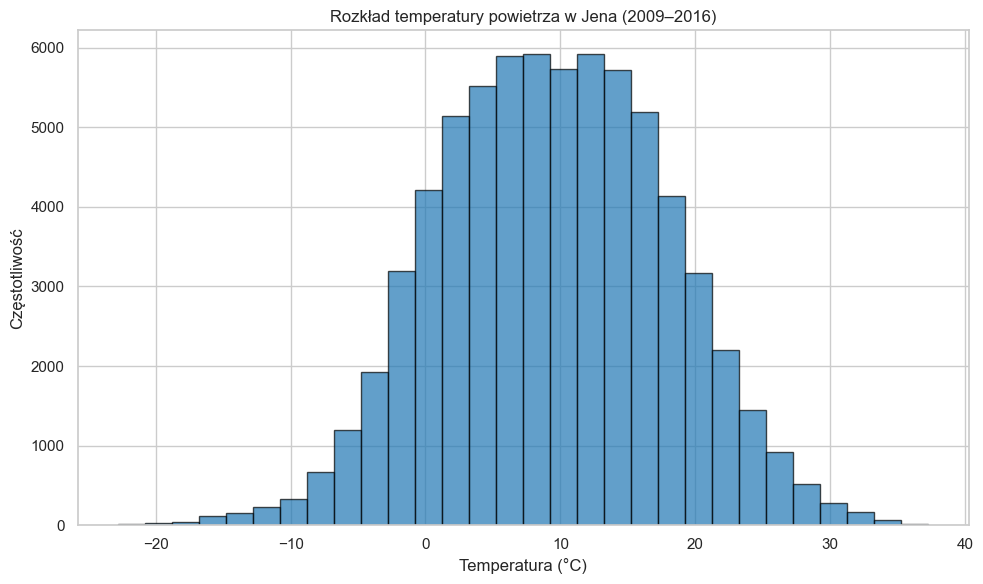

In [96]:
plt.figure(figsize=(10, 6))
df_temp["T (degC)"].plot.hist(bins=30, alpha=0.7, color='tab:blue', edgecolor='black')

# Ustawienia wykresu
plt.title('Rozkład temperatury powietrza w Jena (2009–2016)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Częstotliwość')
plt.grid(True)
plt.tight_layout()

# Pokaż wykres
plt.show()

# DATA ANALYSIS

### DESCRIPTIVE STATISTICS

In [97]:
print(df_temp.describe())

           T (degC)      Tpot (K)   Tdew (degC)
count  70091.000000  70091.000000  70091.000000
mean       9.450482    283.493086      4.956471
std        8.423384      8.504424      6.730081
min      -22.760000    250.850000    -24.800000
25%        3.350000    277.440000      0.240000
50%        9.410000    283.460000      5.210000
75%       15.480000    289.530000     10.080000
max       37.280000    311.210000     23.060000


### DAILY AVERAGE

In [98]:
df_daily = df_temp.resample('D').mean()

### DAILY PLOTS

c:\Users\piotr\OneDrive\Dokumenty\Uni\time-series-forecasting-rpi\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\piotr\OneDrive\Dokumenty\Uni\time-series-forecasting-rpi\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\piotr\OneDrive\Dokumenty\Uni\time-series-forecasting-rpi\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


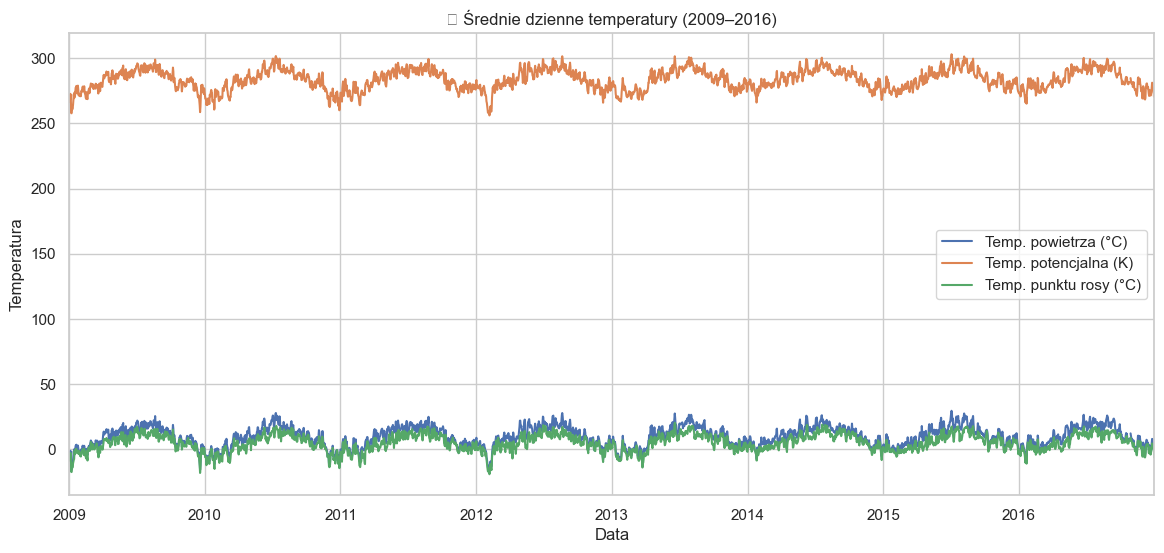

In [99]:
df_daily.plot(title="📈 Średnie dzienne temperatury (2009–2016)")
plt.ylabel("Temperatura")
plt.xlabel("Data")
plt.legend(["Temp. powietrza (°C)", "Temp. potencjalna (K)", "Temp. punktu rosy (°C)"])
plt.grid(True)
plt.show()

### MONTHLY BOXPLOT

C:\Users\piotr\AppData\Local\Temp\ipykernel_16220\2076142655.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = list(pd.date_range('2000-01-01', periods=12, freq='M').month_name())
C:\Users\piotr\AppData\Local\Temp\ipykernel_16220\2076142655.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
c:\Users\piotr\OneDrive\Dokumenty\Uni\time-series-forecasting-rpi\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


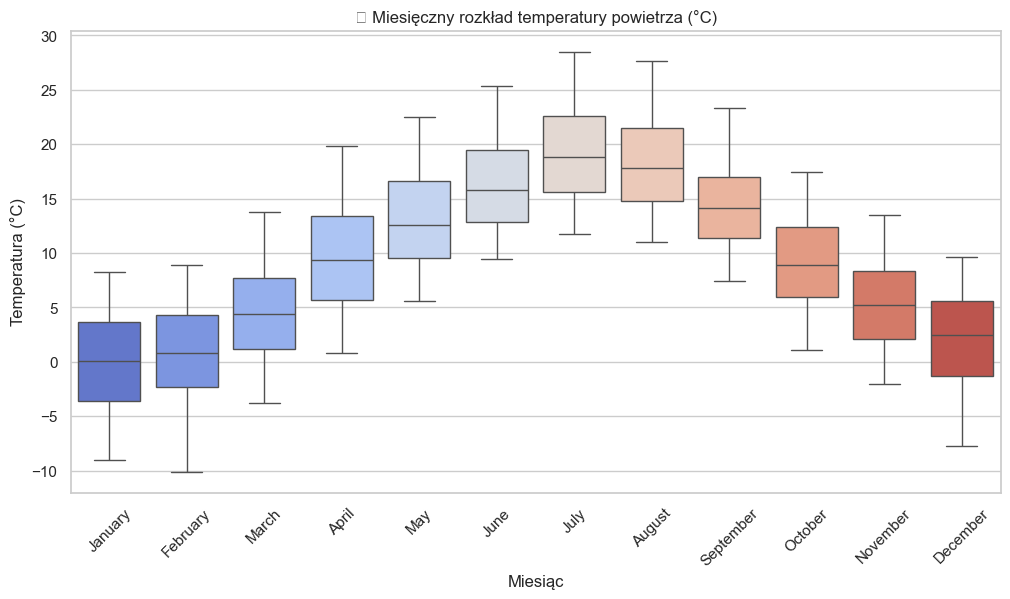

In [100]:
df_temp['month'] = df_temp.index.month_name()
months = list(pd.date_range('2000-01-01', periods=12, freq='M').month_name())

plt.figure(figsize=(12,6))
sns.boxplot(
    x='month', y='T (degC)',
    data=df_temp.reset_index(),
    palette='coolwarm',
    order=months,
    whis=[5,95],
    showfliers=False
)
plt.title("📦 Miesięczny rozkład temperatury powietrza (°C)")
plt.xlabel("Miesiąc")
plt.ylabel("Temperatura (°C)")
plt.xticks(rotation=45)
plt.show()

### DAILY TEMPERATURE

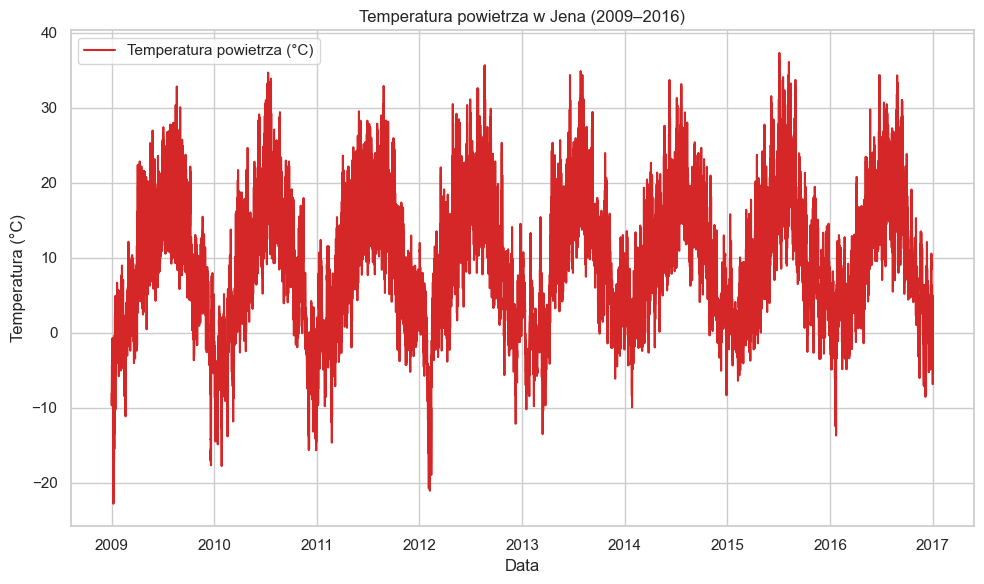

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(df_temp.index, df_temp['T (degC)'], label='Temperatura powietrza (°C)', color='tab:red')
plt.title('Temperatura powietrza w Jena (2009–2016)')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### AVERAGE YEARLY TEMPERATURE

C:\Users\piotr\AppData\Local\Temp\ipykernel_16220\1357925790.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_avg = df_temp['T (degC)'].resample('A').mean()


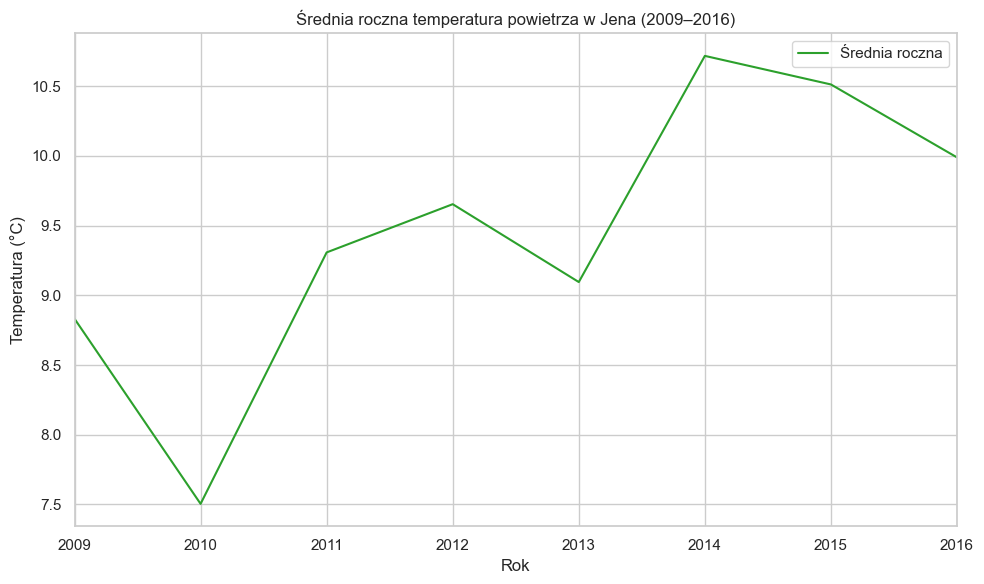

In [102]:
annual_avg = df_temp['T (degC)'].resample('A').mean()

plt.figure(figsize=(10, 6))
annual_avg.plot(label='Średnia roczna', color='tab:green')
plt.title('Średnia roczna temperatura powietrza w Jena (2009–2016)')
plt.xlabel('Rok')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### MONTHLY AVERAGE

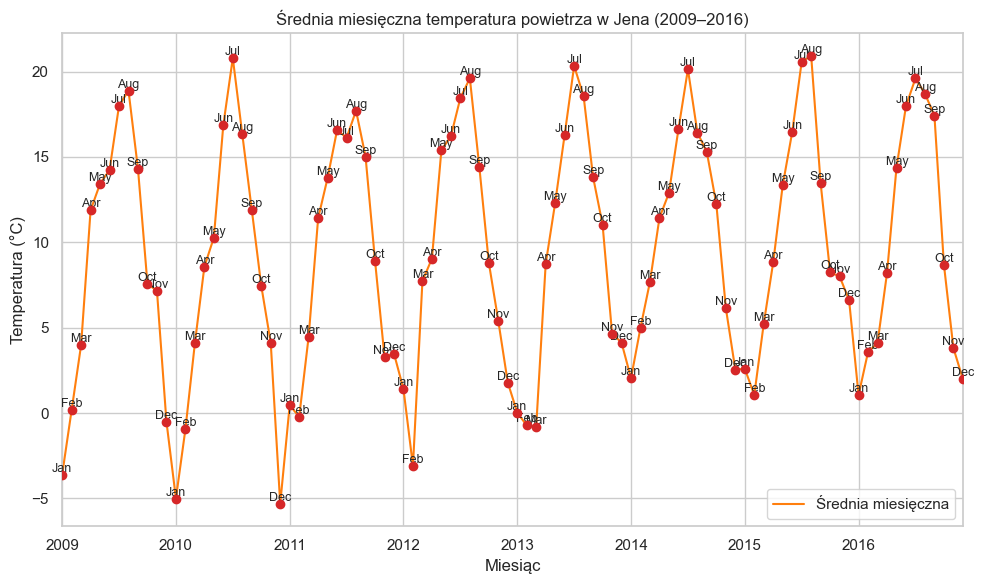

In [103]:
monthly_avg = df_temp['T (degC)'].resample('ME').mean()

plt.figure(figsize=(10, 6))
monthly_avg.plot(label='Średnia miesięczna', color='tab:orange')

plt.scatter(monthly_avg.index, monthly_avg, color='tab:red', zorder=5)

for i, (date, temp) in enumerate(zip(monthly_avg.index, monthly_avg)):
    plt.text(date, temp, date.strftime('%b'), ha='center', va='bottom', fontsize=9)

# Ustawienia osi i tytuł
plt.title('Średnia miesięczna temperatura powietrza w Jena (2009–2016)')
plt.xlabel('Miesiąc')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Pokaż wykres
plt.show()

### CORRELATION MATRIX

c:\Users\piotr\OneDrive\Dokumenty\Uni\time-series-forecasting-rpi\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


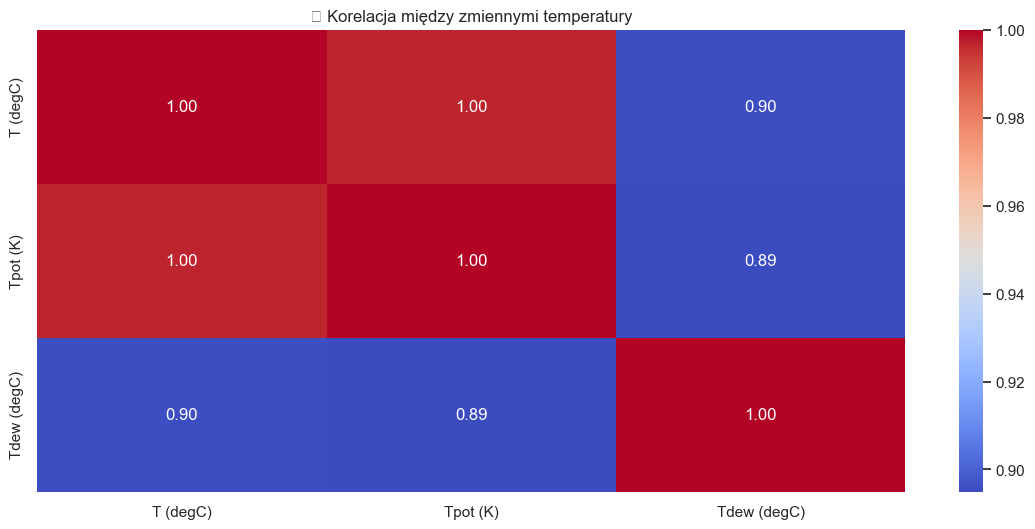

In [104]:
corr = df_temp[['T (degC)', 'Tpot (K)', 'Tdew (degC)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔗 Korelacja między zmiennymi temperatury")
plt.show()

# DATA STANDARIZATION

In [105]:
scaler = StandardScaler()
data = scaler.fit_transform(df)
print(data)

mean_temp = scaler.mean_[0]
print(f"Average temperature: {mean_temp:.2f} °C")

std_temp = scaler.scale_[0]
print(f"Standard deviation: {std_temp:.2f}")

[[ 0.87179197 -2.07762187 -2.12985794 ... -0.02280572 -0.03086151
   0.20677846]
 [ 0.88614805 -2.1761578  -2.22863076 ... -0.02219453 -0.03086151
   0.17907085]
 [ 0.91246754 -2.16784754 -2.22275143 ... -0.0232641  -0.03086151
  -0.08761486]
 ...
 [ 1.43287552 -1.44841656 -1.54897965 ... -0.01516595 -0.01855945
  -0.18574597]
 [ 1.36827315 -1.46503708 -1.56073832 ... -0.02066658 -0.03020011
   0.48385453]
 [ 1.30367078 -1.58850378 -1.67714915 ... -0.01745788 -0.02596714
   0.32107234]]
Average temperature: 989.21 °C
Standard deviation: 8.36


# DATASET CLASS

In [106]:
class JenaDataset(Dataset):
    def __init__(self, data, sequence_length, target_index, pred_len=3):
        self.data = data
        self.seq_len = sequence_length
        self.target_idx = target_index
        self.pred_len = pred_len

    def __len__(self):
       return len(self.data) - self.seq_len - self.pred_len + 1

    def __getitem__(self, idx):
        x = self.data[idx:idx + self.seq_len]
        y = self.data[idx + self.seq_len : idx + self.seq_len + self.pred_len, self.target_idx]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


# SPLITTING DATA

In [107]:
split_ratio = 0.8
split_index = int(len(data) * split_ratio)
train_dataset = JenaDataset(data[:split_index], sequence_length, target_index)
val_dataset = JenaDataset(data[split_index:], sequence_length, target_index)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# WEATHER LSTM MODEL

In [108]:
class WeatherLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2):
        super(WeatherLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, 3)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.linear(out[:, -1])  # Only the last timestep
        return out.squeeze()

# MODEL INITIALIZATION

In [109]:
input_size = data.shape[1]
print(input_size)
model = WeatherLSTM(input_size)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

14


# TRAINING LOOP

In [110]:
def train_model(model, train_loader, val_loader, epochs=100):
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for xb, yb in train_loader:
            optimizer.zero_grad()
            pred = model(xb)
            loss = loss_fn(pred, yb)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for xb, yb in val_loader:
                pred = model(xb)
                loss = loss_fn(pred, yb)
                val_loss += loss.item()
        val_loss /= len(val_loader)

        print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

### TRAINING RUN

In [111]:
train_model(model, train_loader, val_loader, epochs=60)

Epoch 1: Train Loss = 0.0548, Val Loss = 0.0195
Epoch 2: Train Loss = 0.0191, Val Loss = 0.0189
Epoch 3: Train Loss = 0.0182, Val Loss = 0.0191
Epoch 4: Train Loss = 0.0177, Val Loss = 0.0185
Epoch 5: Train Loss = 0.0173, Val Loss = 0.0176
Epoch 6: Train Loss = 0.0169, Val Loss = 0.0180
Epoch 7: Train Loss = 0.0167, Val Loss = 0.0191
Epoch 8: Train Loss = 0.0164, Val Loss = 0.0176
Epoch 9: Train Loss = 0.0163, Val Loss = 0.0199
Epoch 10: Train Loss = 0.0159, Val Loss = 0.0187
Epoch 11: Train Loss = 0.0157, Val Loss = 0.0175
Epoch 12: Train Loss = 0.0155, Val Loss = 0.0183
Epoch 13: Train Loss = 0.0152, Val Loss = 0.0179
Epoch 14: Train Loss = 0.0152, Val Loss = 0.0169
Epoch 15: Train Loss = 0.0149, Val Loss = 0.0170
Epoch 16: Train Loss = 0.0147, Val Loss = 0.0180
Epoch 17: Train Loss = 0.0145, Val Loss = 0.0197
Epoch 18: Train Loss = 0.0144, Val Loss = 0.0179
Epoch 19: Train Loss = 0.0142, Val Loss = 0.0172
Epoch 20: Train Loss = 0.0140, Val Loss = 0.0178
Epoch 21: Train Loss = 0.0139

### EXAMPLE

In [112]:
recent_data = df.tail(sequence_length).values
print(df.tail(sequence_length))

recent_scaled = scaler.transform(recent_data)

# Convert to tensor and add batch dimension
x_input = torch.tensor(recent_scaled, dtype=torch.float32).unsqueeze(0)  # shape: (1, seq_len, features)

# Predict
model.eval()
with torch.no_grad():
    pred_scaled = model(x_input).squeeze(0)  # usuń batch dim, shape: (3,)

# Inverse transform to get temperature in Celsius
pred_celsius = pred_scaled.numpy() * scaler.scale_[target_index] + scaler.mean_[target_index]

# Wyświetl prognozy po kolei
for i, temp in enumerate(pred_celsius, 1):
    print(f"Predicted temperature for step {i}: {temp:.2f} °C")


        p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
420407   1008.64     -4.17    268.33        -5.36   91.40          4.48   
420413   1008.05     -4.26    268.28        -6.37   85.10          4.45   
420419   1007.52     -5.05    267.54        -6.28   91.00          4.19   
420425   1007.35     -4.67    267.93        -6.56   86.50          4.32   
420431   1006.95     -4.47    268.16        -7.77   77.60          4.38   
420437   1006.71     -4.90    267.74        -8.64   74.90          4.24   
420443   1006.59     -5.17    267.48        -9.31   72.50          4.15   
420449   1006.57     -6.20    266.46        -8.77   81.90          3.84   
420455   1006.22     -6.84    265.85        -8.71   86.40          3.65   
420461   1006.23     -6.31    266.37        -8.42   84.90          3.81   
420467   1005.99     -5.02    267.68        -7.71   81.30          4.20   
420473   1005.38     -3.31    269.44        -6.62   77.70          4.78   
420479   1004.62     -0.7

c:\Users\piotr\OneDrive\Dokumenty\Uni\time-series-forecasting-rpi\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# EXPORT TO RASPBERRY PI

In [19]:
model.eval()

dummy_input = torch.randn(1, sequence_length, input_size)

traced_model = torch.jit.trace(model, dummy_input)

traced_model.save("weather_lstm_model.pt")


# MODEL EVALUATION

In [ ]:
y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for xb, yb in val_loader:
        preds = model(xb)
        y_true.append(yb.numpy())
        y_pred.append(preds.numpy())

# Konwersja do numpy
y_true = np.concatenate(y_true, axis=0)
y_pred = np.concatenate(y_pred, axis=0)

# Odskalowanie danych, by były w °C
y_true_celsius = y_true * scaler.scale_[target_index] + scaler.mean_[target_index]
y_pred_celsius = y_pred * scaler.scale_[target_index] + scaler.mean_[target_index]


[[13.8599998  13.04999998 12.79999989]
 [13.04999998 12.79999989 12.17999989]
 [12.79999989 12.17999989 11.15      ]
 ...
 [-0.98000042 -1.4000004  -2.75000025]
 [-1.4000004  -2.75000025 -2.89000024]
 [-2.75000025 -2.89000024 -3.93000048]]


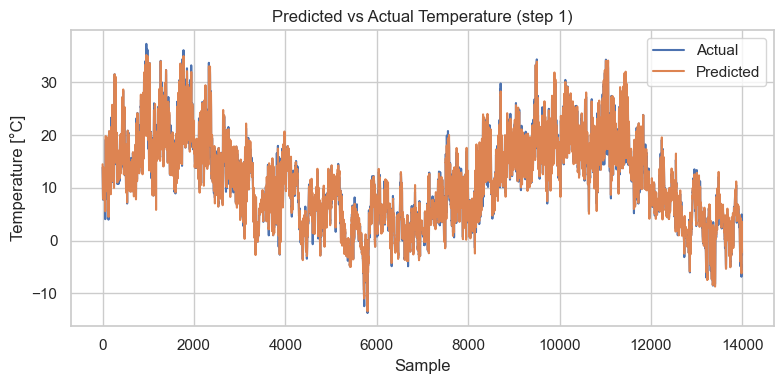

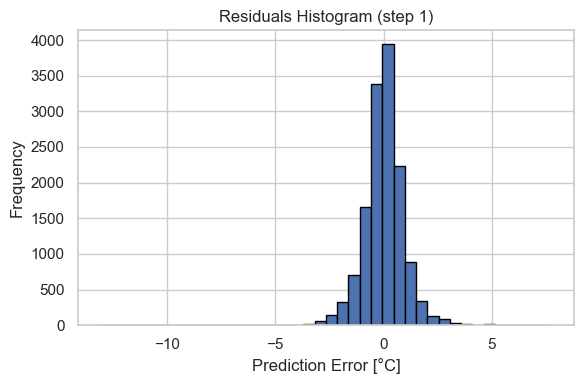

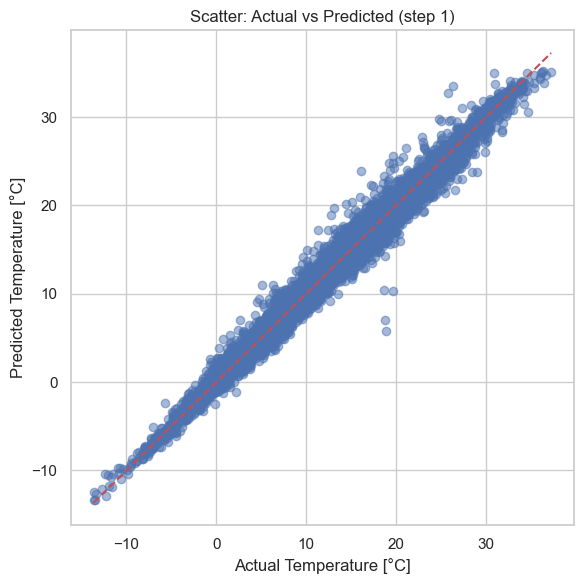

[Step 1] MSE: 0.8975 °C², R²: 0.9863


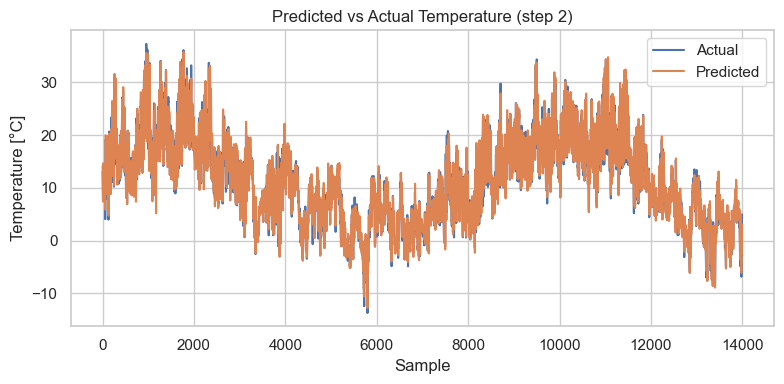

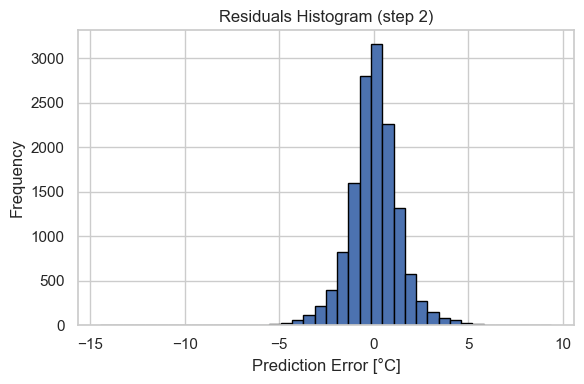

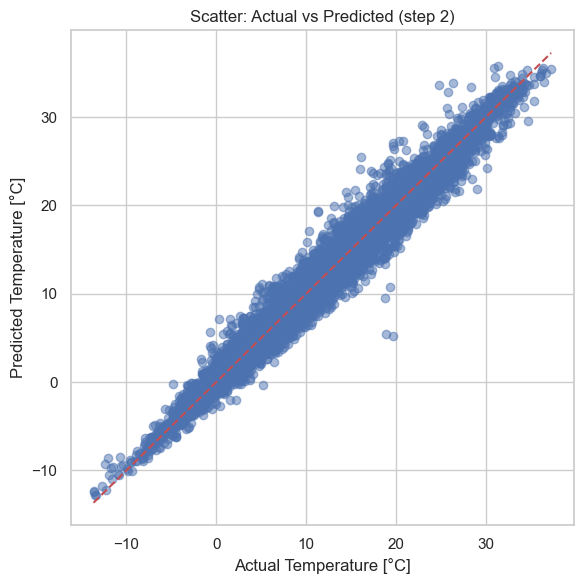

[Step 2] MSE: 1.8063 °C², R²: 0.9725


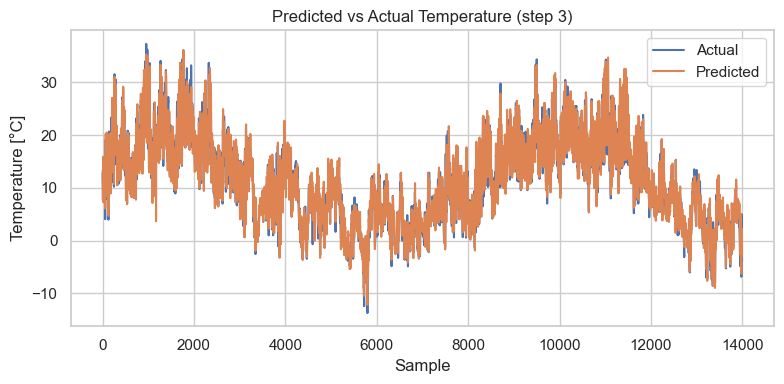

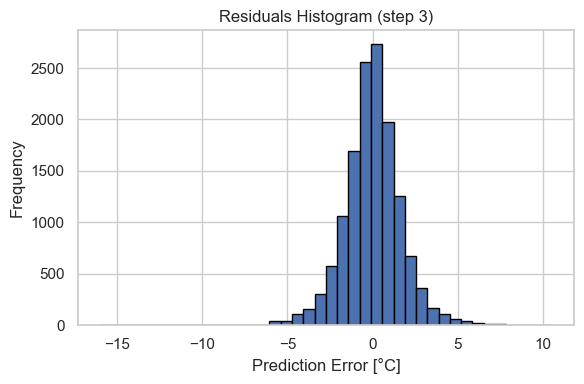

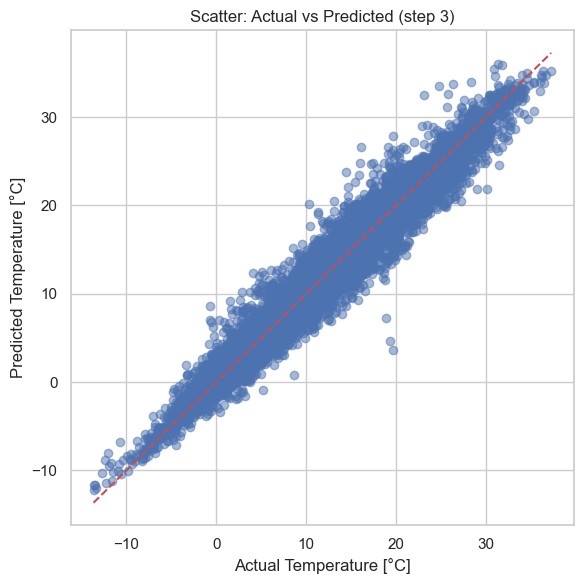

[Step 3] MSE: 2.8746 °C², R²: 0.9562


In [114]:
for i in range(3):
    plt.figure(figsize=(8, 4))
    plt.plot(y_true_celsius[:, i], label="Actual")
    plt.plot(y_pred_celsius[:, i], label="Predicted")
    plt.title(f"Predicted vs Actual Temperature (step {i+1})")
    plt.xlabel("Sample")
    plt.ylabel("Temperature [°C]")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Wykres reszt
    plt.figure(figsize=(6, 4))
    residuals = y_pred_celsius[:, i] - y_true_celsius[:, i]
    plt.hist(residuals, bins=40, edgecolor='black')
    plt.title(f"Residuals Histogram (step {i+1})")
    plt.xlabel("Prediction Error [°C]")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Scatter plot
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true_celsius[:, i], y_pred_celsius[:, i], alpha=0.5)
    plt.plot([min(y_true_celsius[:, i]), max(y_true_celsius[:, i])],
             [min(y_true_celsius[:, i]), max(y_true_celsius[:, i])],
             'r--')
    plt.title(f"Scatter: Actual vs Predicted (step {i+1})")
    plt.xlabel("Actual Temperature [°C]")
    plt.ylabel("Predicted Temperature [°C]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Metryki
    mse = mean_squared_error(y_true_celsius[:, i], y_pred_celsius[:, i])
    r2 = r2_score(y_true_celsius[:, i], y_pred_celsius[:, i])
    print(f"[Step {i+1}] MSE: {mse:.4f} °C², R²: {r2:.4f}")